In [25]:
import operator
import os
import numpy as np
import matplotlib.pyplot as plt
from defs import *
import model
from scipy.interpolate import make_interp_spline, BSpline

In [26]:
# Read the data set
X_TRAIN, Y_TRAIN, X_TEST, Y_TEST = read_data()

Plot the data set:

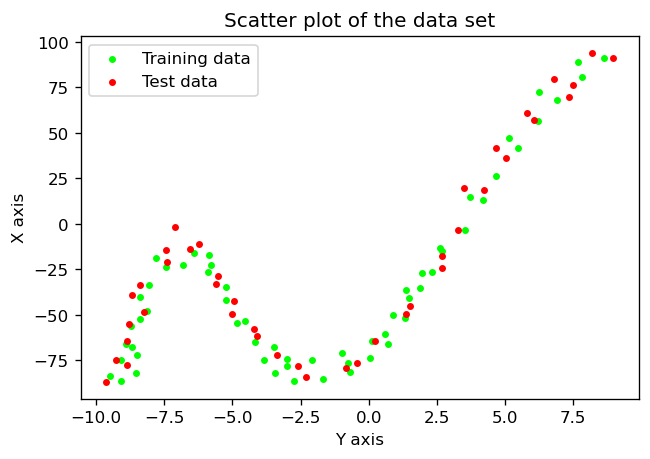

In [27]:
plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x=X_TRAIN, y=Y_TRAIN, s=10, c='#00FF00')
plt.scatter(x=X_TEST, y=Y_TEST, s=10, c='#FF0000')
plt.title("Scatter plot of the data set")
plt.ylabel("X axis")
plt.xlabel("Y axis")
plt.legend(labels=["Training data", "Test data"])
plt.show()

## PART A & B
Regress the training data using 512 units

NN w/ 1 Hidden Layer w/ 512 units...
Max epochs have been reached... w/ Loss = 4439.6758880176185


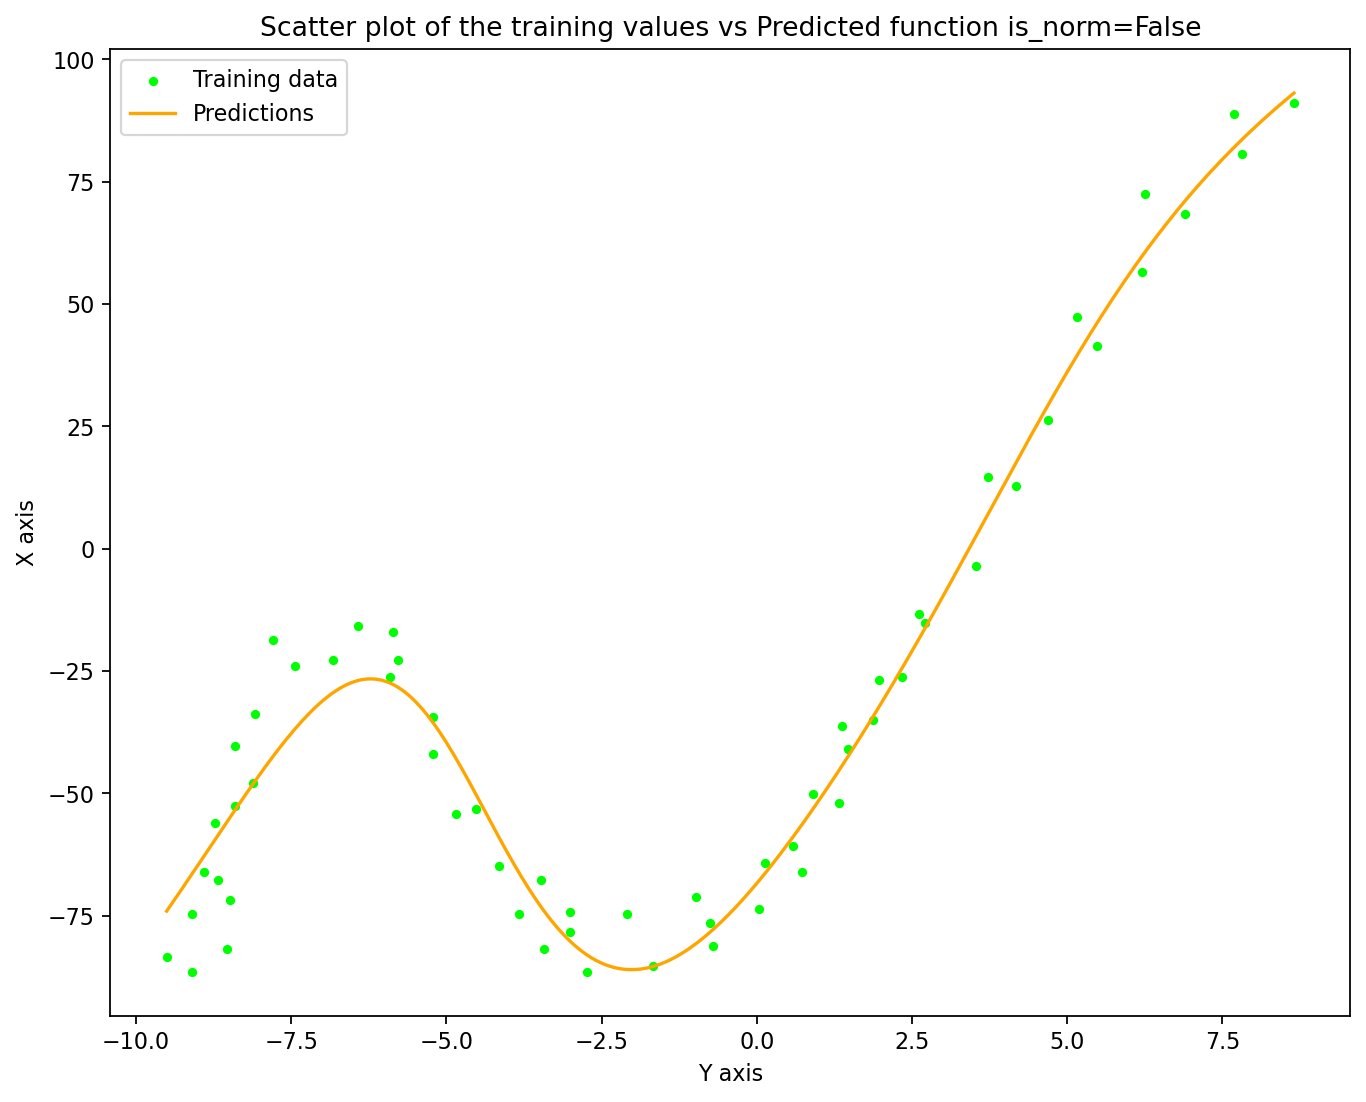

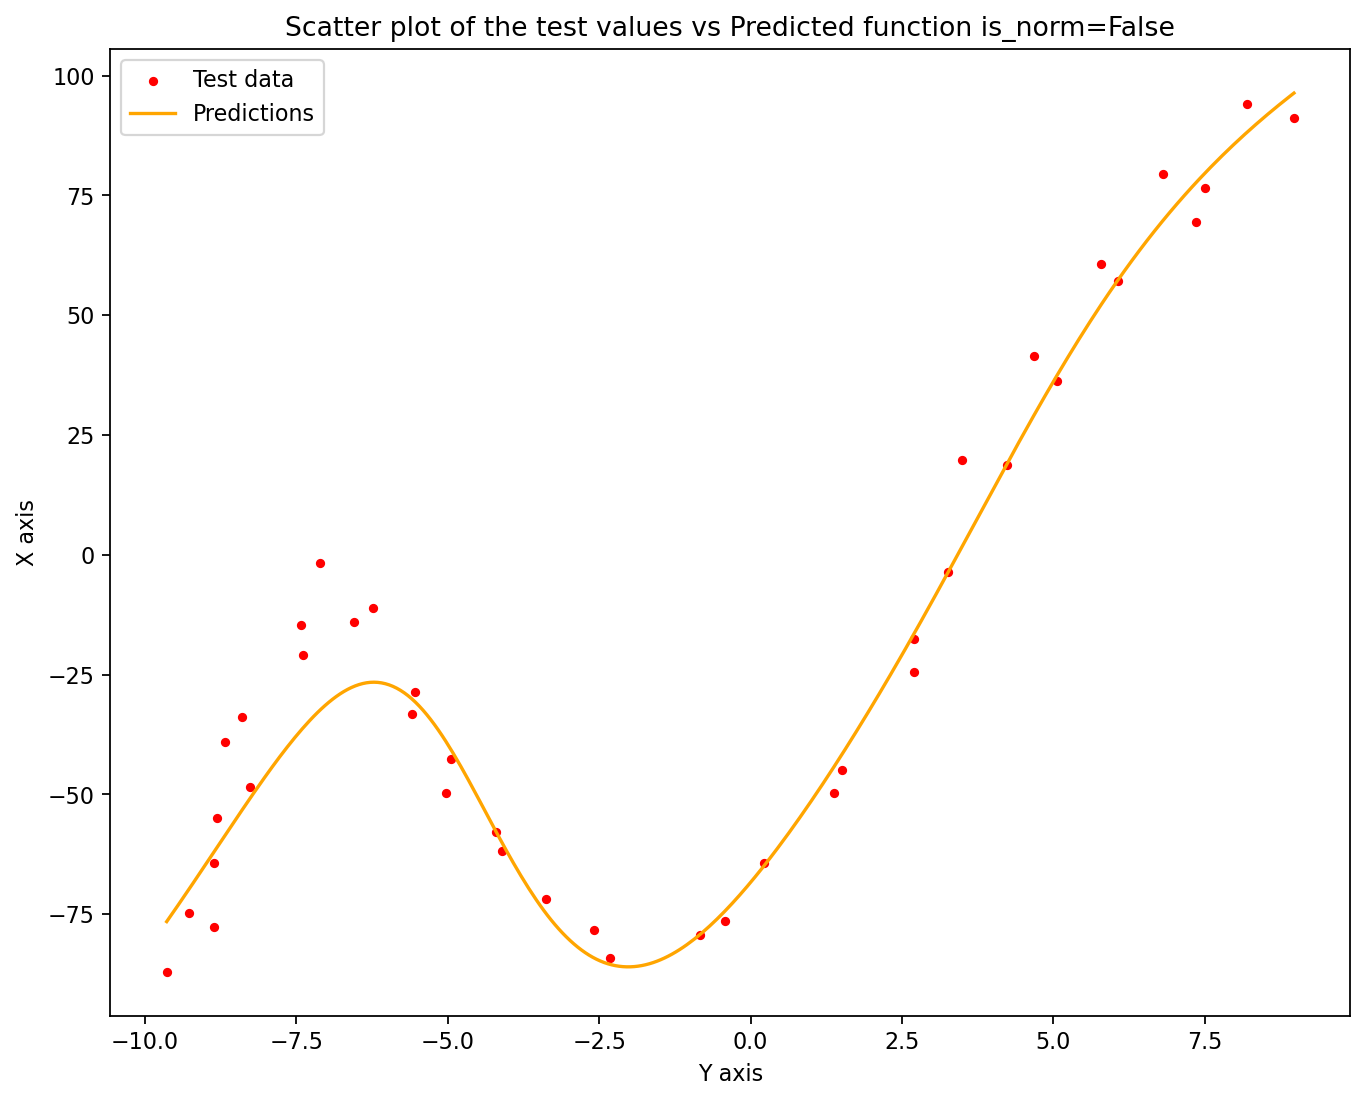

Training loss = 4439.6758880176185
Test loss = 4340.263546324948


In [28]:
# Regress the training data using 512 units
artificial_nn = model.ANN(num_units=512, epochs=500000, learning_rate=5e-5, is_normalized=False, stop_M=3)
artificial_nn.train(X_TRAIN, Y_TRAIN)
y_predict_train, train_loss = artificial_nn.predict(X_TRAIN, Y_TRAIN)
y_predict_test, test_loss = artificial_nn.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train, is_test=False, is_norm=False)
plot_predictions(X_TEST, Y_TEST, y_predict_test, is_test=True, is_norm=False)
print(f"Training loss = {train_loss}")
print(f"Test loss = {test_loss}")

Now, use no units at all, simple linear regression:

Using no hidden layers...
Epoch 5 have converged w/ Loss = 739.4606785092213
Max epochs have been reached... w/ Loss = 739.4606785092213


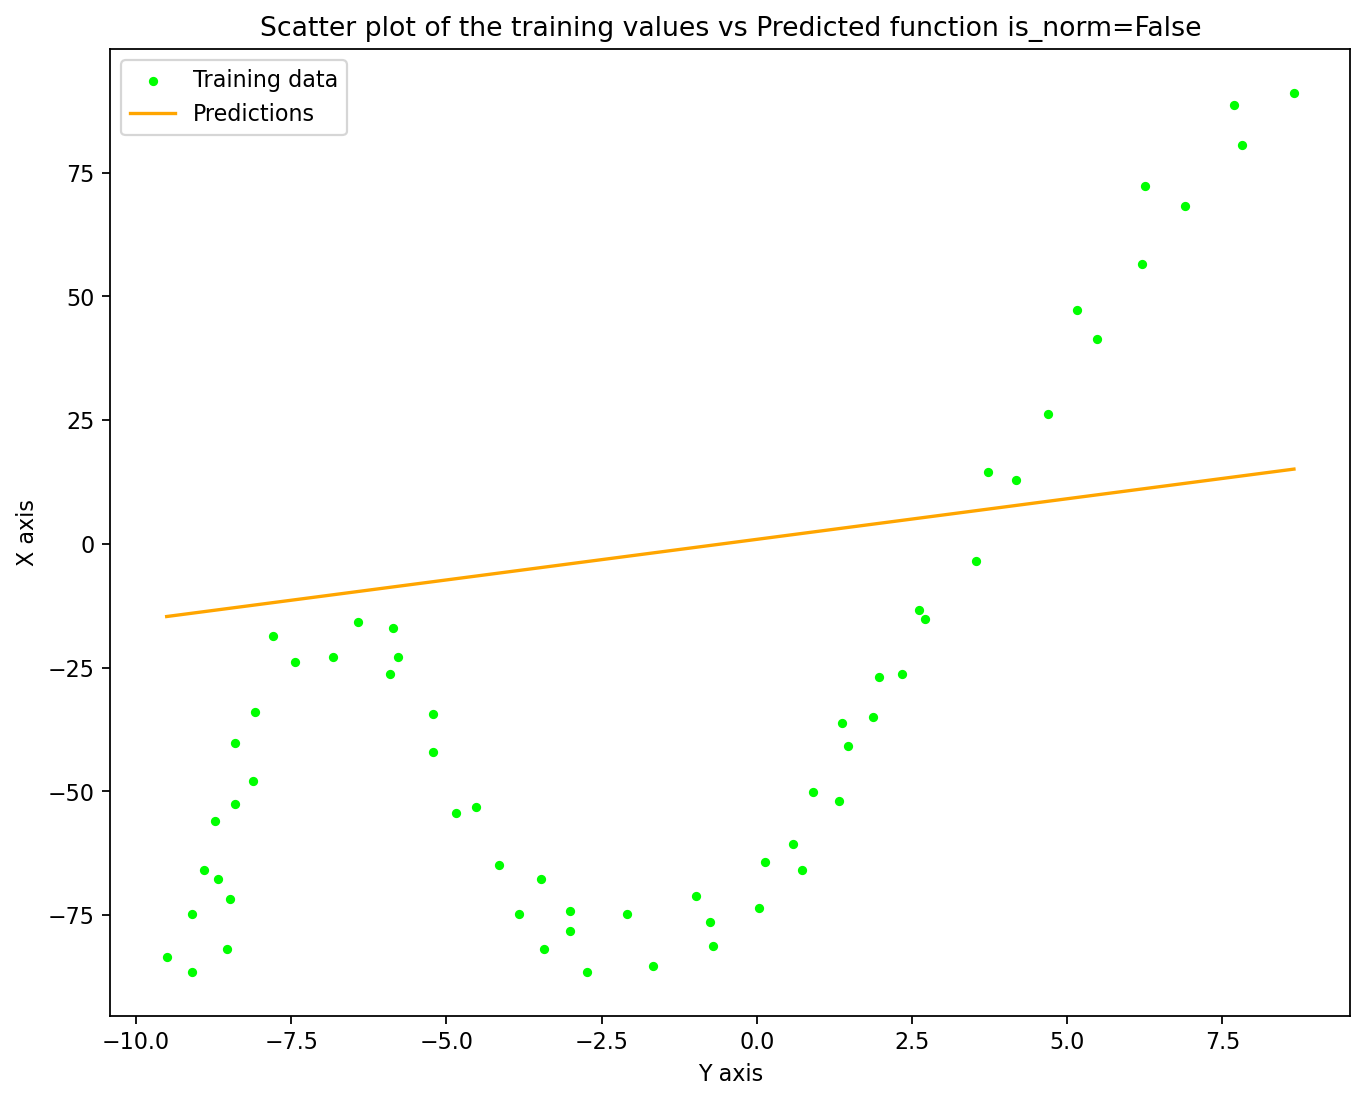

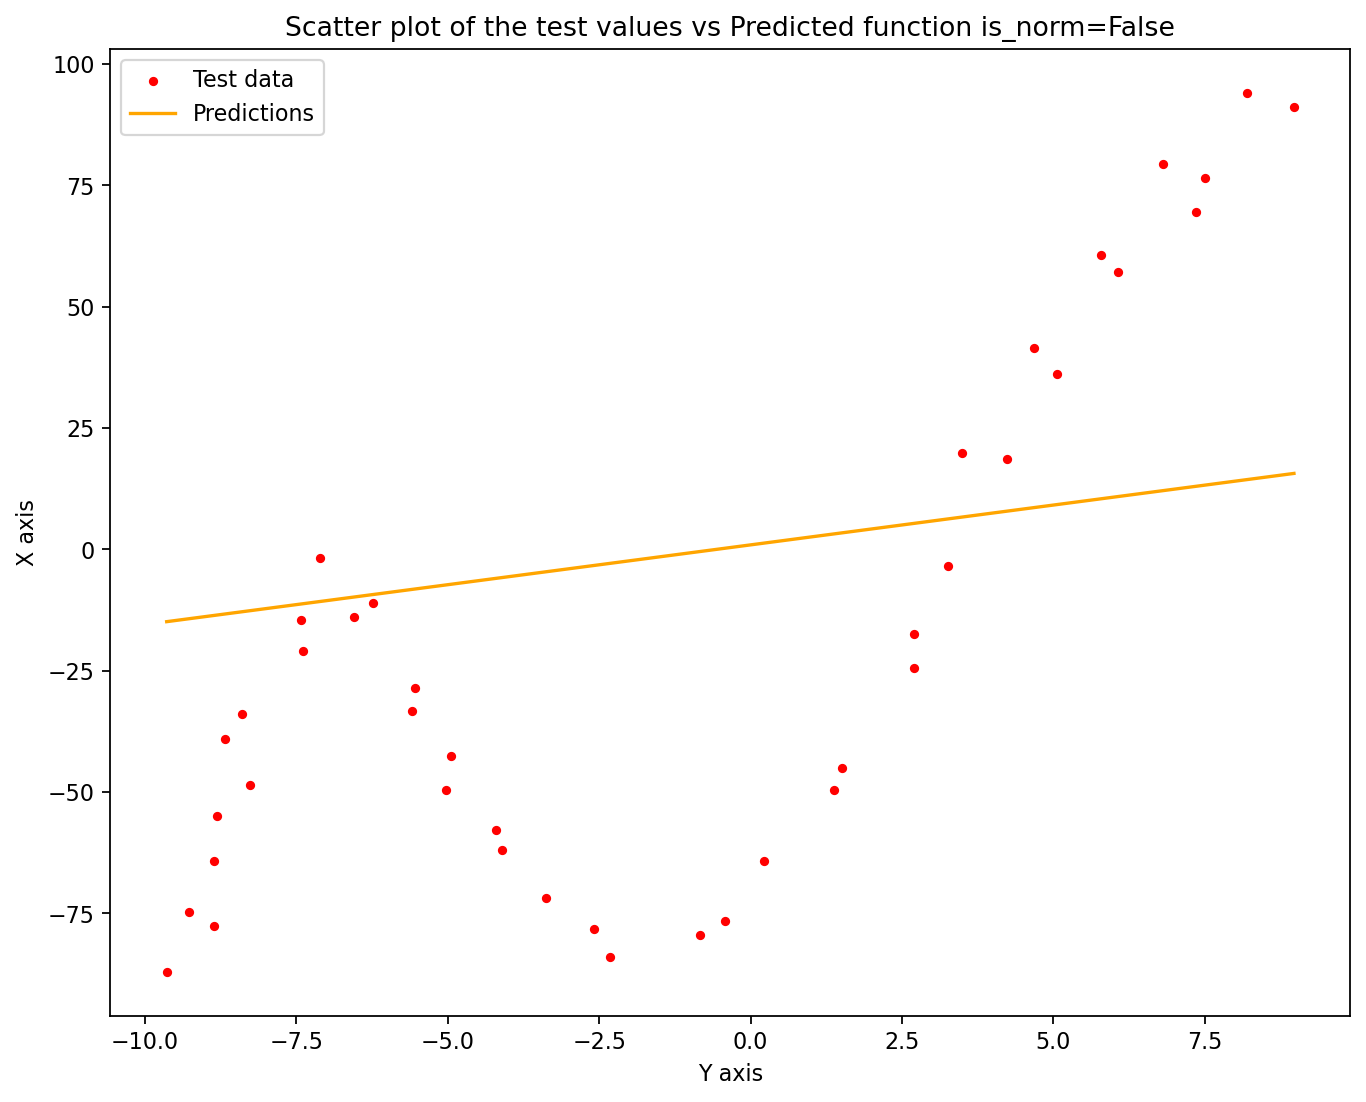

Training loss = 12015871.190951524
Test loss = 5412441.762023624


In [29]:
# Now, use no units at all:
artificial_nn_linear = model.ANN(num_units=0, epochs=100000, learning_rate=5e-4, is_normalized=False, stop_M=3)
artificial_nn_linear.train(X_TRAIN, Y_TRAIN)
y_predict_train_linear, train_loss_linear = artificial_nn_linear.predict(X_TRAIN, Y_TRAIN)
y_predict_test_linear, test_loss_linear = artificial_nn_linear.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_linear, is_test=False, is_norm=False)
plot_predictions(X_TEST, Y_TEST, y_predict_test_linear, is_test=True, is_norm=False)
print(f"Training loss = {train_loss_linear}")
print(f"Test loss = {test_loss_linear}")

Now, use normalization

Using normalization...
NN w/ 1 Hidden Layer w/ 32 units...
Max epochs have been reached... w/ Loss = 3.2082916520851192
Using normalization while predicting...
Using normalization while predicting...


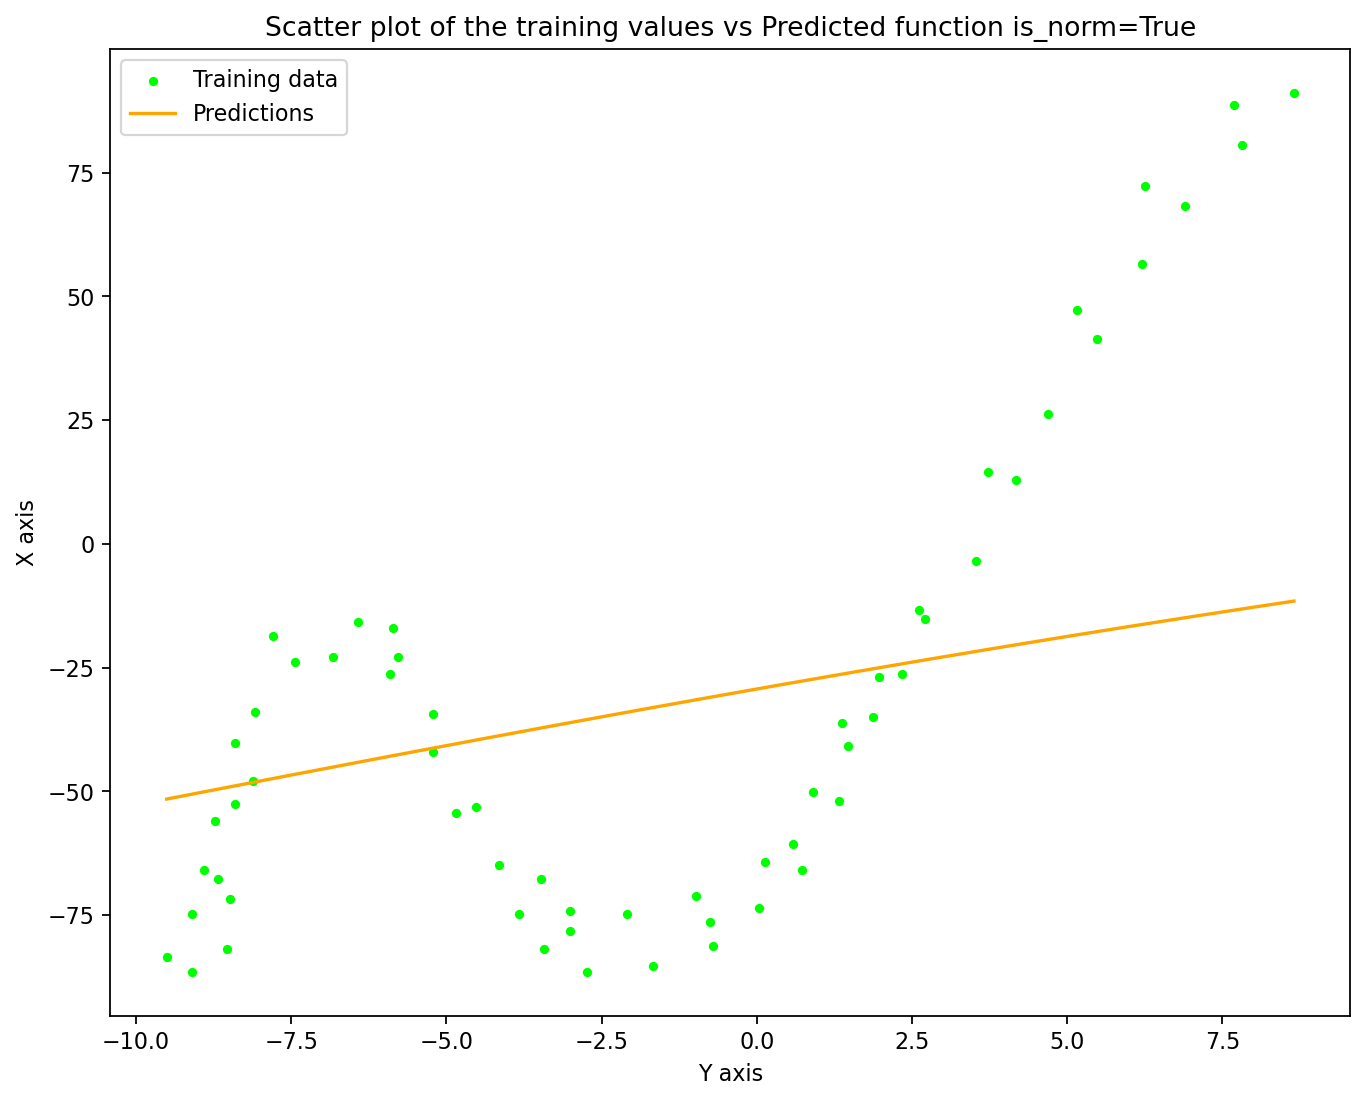

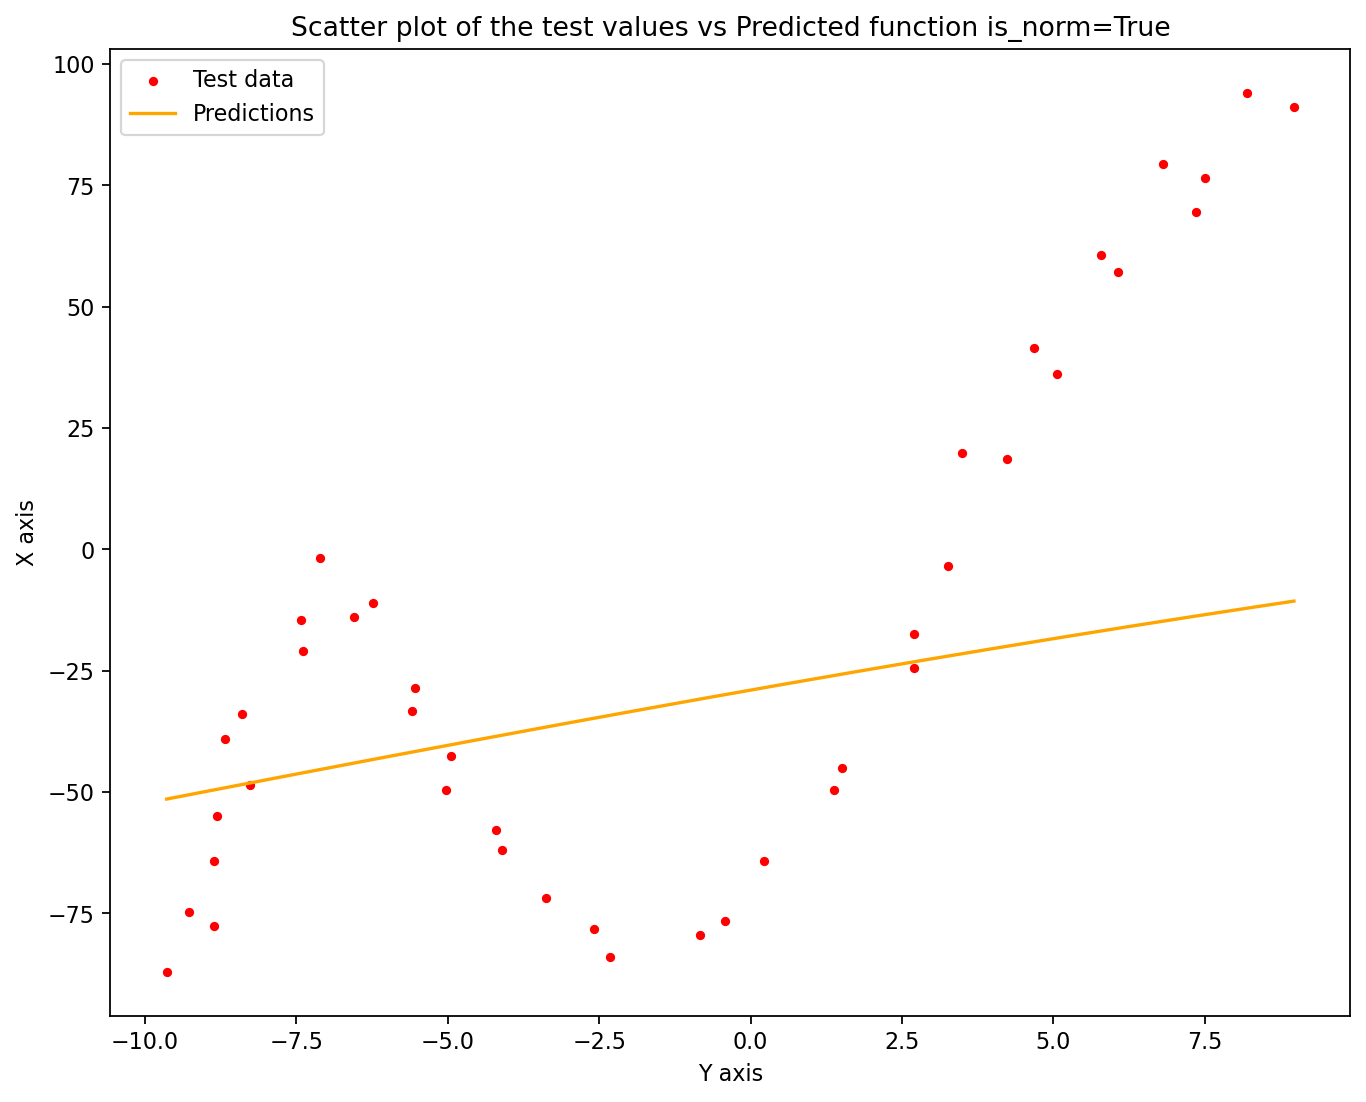

Training loss = 3.2082916520851192
Test loss = 2.7282546597924786


In [30]:
# Now, use normalization
is_normalized = True
artificial_nn_normalized = model.ANN(num_units=32, epochs=100000, learning_rate=5e-4, is_normalized=is_normalized, stop_M=3)
artificial_nn_normalized.train(X_TRAIN, Y_TRAIN)
y_predict_train_norm, train_loss_norm = artificial_nn_normalized.predict(X_TRAIN, Y_TRAIN)
y_predict_test_norm, test_loss_norm = artificial_nn_normalized.predict(X_TEST, Y_TEST)
plot_predictions(X_TRAIN, Y_TRAIN, y_predict_train_norm, is_test=False, is_norm=is_normalized)
plot_predictions(X_TEST, Y_TEST, y_predict_test_norm, is_test=True, is_norm=is_normalized)
print(f"Training loss = {train_loss_norm}")
print(f"Test loss = {test_loss_norm}")

## PART C
Use the following hyperparameters.
`num_units = [2, 4, 8, 16, 32]`
Then plot the training predictions as in previous part by using these hyperparameters only. However, arrange learning rates, initial weights, stopping conditions accordingly.

Then, create two tables, for training loss and the test loss. Report the training loss averaged over training set instances and the standard deviation of this array, whose size is 5. Then, same for the test loss/ set.

In [31]:
#TODO